In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
np.random.seed(0)

# Cargar datos

En primer lugar cargaremos el fichero que contiene los datos.

Después agruparemos los valores de la columna *DELTAINTEGER* por día y los sumaremos de forma que tan solo haya una observación por día y contador.

In [3]:
df = pd.read_csv(r'..\data\raw\Modelar_UH2022.txt', sep='|')
df

,ID,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH
0,0,2019-06-13 08:34:09,369320,0.0,17,0.0
1,0,2019-06-13 17:34:10,369403,0.0,2,0.0
2,0,2019-06-13 18:34:10,369403,0.0,0,0.0
3,0,2019-06-13 04:34:10,369284,0.0,1,0.0
4,0,2019-06-13 14:34:10,369356,0.0,28,0.0
...,...,...,...,...,...,...
21404823,2749,2019-10-11 06:27:14,164505,0.0,0,0.0
21404824,2756,2019-04-06 05:50:17,349758,0.0,0,0.0
21404825,2756,2019-04-06 07:50:17,349770,0.0,12,0.0
21404826,2756,2019-04-06 04:50:17,349758,0.0,0,0.0


In [4]:
df.isnull().sum().sum()

280112

In [5]:
def get_number(x):
    integer = str(x['DELTAINTEGER']).split('.')[0]
    housandth = str(x['DELTATHOUSANDTH']).split('.')[0]
    if integer == 'nan':
    return 'nan'
    elif housandth == 'nan':
    return integer
    else:
    return integer + '.' + housandth

In [6]:
df['DELTA'] = df.apply(lambda row: get_number(row), axis = 1)

In [7]:
df['DELTA'] = df['DELTA'].astype('float')

In [8]:
df['SAMPLETIME'] = pd.to_datetime(df['SAMPLETIME']).dt.date

In [9]:
df1 = df.groupby(['ID', 'SAMPLETIME']).sum()
df1

READINGINTEGER  READINGTHOUSANDTH  DELTAINTEGER  \
ID   SAMPLETIME                                                    
0    2019-02-01         7963359                0.0           243   
     2019-02-02         7969096                0.0           236   
     2019-02-03         7975263                0.0           335   
     2019-02-04         7982426                0.0           252   
     2019-02-05         7988972                0.0           220   
...                         ...                ...           ...   
2748 2019-08-03         1627386                0.0           313   
     2019-09-14         1690044                0.0             8   
2749 2019-08-06          627196                0.0             0   
     2019-10-11          658022                0.0             2   
2756 2019-04-06         1399044                0.0            12   

                 DELTATHOUSANDTH  DELTA  
ID   SAMPLETIME                          
0    2019-02-01              0.0  243.0  
     2019-02-02              0.0  236.0  
     2019-02-03              0.0  335.0  
     2019-02-04              0.0  252.0  
     2019-02-05              0.0  220.0  
...                          ...    ...  
2748 2019-08-03              0.0  313.0  
     2019-09-14              0.0    8.0  
2749 2019-08-06              0.0    0.0  
     2019-10-11              0.0    2.0  
2756 2019-04-06              0.0   12.0  

[890837 rows x 5 columns]

In [10]:
df1 = df1.pivot_table(values='DELTA', index='ID', columns='SAMPLETIME')
df1

SAMPLETIME,2019-02-01,2019-02-02,2019-02-03,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,2019-02-09,2019-02-10,...,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31
ID,,,,,,,,,,,,,,,,,,,,,
0,243.00,236.00,335.00,252.0,220.0,276.00,277.00,193.00,262.00,315.00,...,460.0,331.0,368.00,390.00,304.00,213.0,232.0,403.00,425.0,255.00
1,8.00,47.00,6.00,12.0,44.0,0.00,6.99,0.00,92.06,62.00,...,0.0,3.0,5.61,1.32,2.97,4.0,1.0,1.98,10.0,32.95
2,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,...,33.0,20.0,37.00,30.00,32.00,39.0,40.0,45.00,27.0,59.00
3,492.00,381.00,313.00,362.0,380.0,453.00,390.00,419.00,459.00,442.00,...,312.0,321.0,439.00,639.00,350.00,289.0,380.0,404.00,339.0,391.00
4,247.56,235.68,254.35,412.0,269.0,224.52,218.25,429.25,306.00,194.97,...,287.0,361.0,203.00,272.04,281.98,263.6,303.4,421.00,420.0,253.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df1 = df1.apply(lambda row : row[~((row-row.mean()).abs() > 3*row.std())], axis=1)

In [12]:
df1

SAMPLETIME,2019-02-01,2019-02-02,2019-02-03,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,2019-02-09,2019-02-10,...,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31
ID,,,,,,,,,,,,,,,,,,,,,
0,243.00,236.00,335.00,252.0,220.0,276.00,277.00,193.00,262.00,315.00,...,460.0,331.0,368.00,390.00,304.00,213.0,232.0,403.00,425.0,255.00
1,8.00,47.00,6.00,12.0,44.0,0.00,6.99,0.00,92.06,62.00,...,0.0,3.0,5.61,1.32,2.97,4.0,1.0,1.98,10.0,32.95
2,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,...,33.0,20.0,37.00,30.00,32.00,39.0,40.0,45.00,27.0,59.00
3,492.00,381.00,313.00,362.0,380.0,453.00,390.00,419.00,459.00,442.00,...,312.0,321.0,439.00,639.00,350.00,289.0,380.0,404.00,339.0,391.00
4,247.56,235.68,254.35,412.0,269.0,224.52,218.25,429.25,306.00,194.97,...,287.0,361.0,203.00,272.04,281.98,263.6,303.4,421.00,420.0,253.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df1.to_csv('df_colab_daily_nan.csv', sep='|')

# Visualización de los datos

Veamos ahora algunas gráficas para tratar de entender la distribución de los datos

La primera gráfica corresponde al contador cero, observamos que hay dos periodos en los que no hay mediciones. En general, parece que las mediciones diarias toman valores cercanos a 300 y no parece que hayan cambios estacionales.

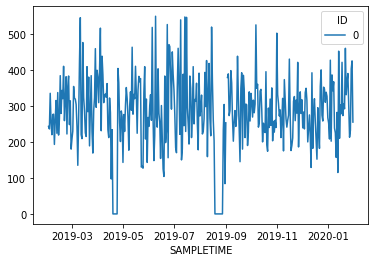

In [14]:
sns.lineplot(data=df1[df1.index==0].transpose());

Veamos ahora las series temporales correspondientes a los 10 primeros contadores.

Observamos que la mayoria de observaciones toman valores entre 0 y 500. Sin embargo, es sorprendente ver que de 10 series 4 tomen valores extremadamente altos de forma puntual.

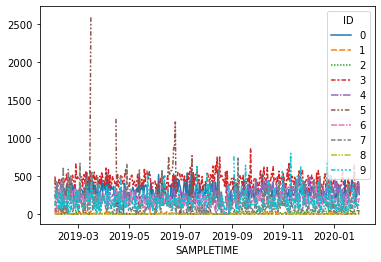

In [15]:
sns.lineplot(data=df1[df1.index.isin(range(10))].transpose());

Visualicemos ahora la media diaria de todas las series.

Observamos que se distribuye de forma similar en la mayoría de meses excepto en octubre, que sufre un aumento drástico.

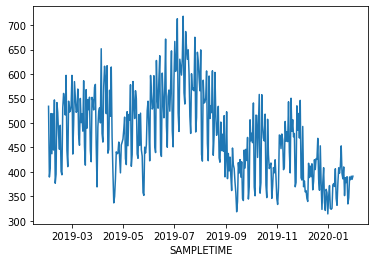

In [16]:
sns.lineplot(data=df1.agg('mean'))